### Haiti Earthquake Crisis
src: https://gist.github.com/dalguji/10979733

This is an example code for "Plotting Maps: Visualizing Haiti Earthquake Crisis Data" on a book, Python for Data Analysis. Page 242-246

/Users/Amigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


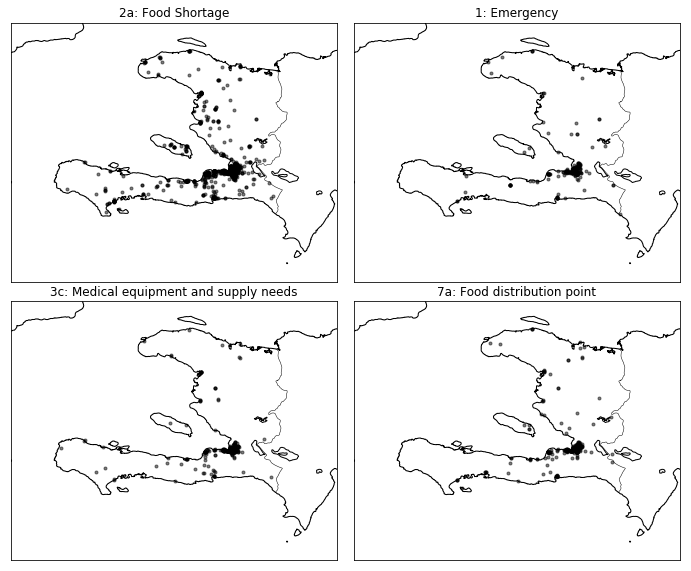

In [5]:
import pandas as pd
import numpy as np
from pandas import DataFrame

data = pd.read_csv('bookMcKinney_data_ch08/Haiti.csv')

data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
		(data.LONGITUDE > -75) & (data.LONGITUDE < -70)
		& data.CATEGORY.notnull()]

def to_cat_list(catstr):
	stripped = (x.strip() for x in catstr.split(','))
	return [x for x in stripped if x]

def get_all_categories(cat_series):
	cat_sets = (set(to_cat_list(x)) for x in cat_series) 
	return sorted(set.union(*cat_sets))

def get_english(cat):
	code, names = cat.split('.') 
	if '|' in names:
		names = names.split(' | ')[1] 
	return code, names.strip()

all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)

def get_code(seq):
	return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
						index=data.index, columns=code_index)

for row, cat in zip(data.index, data.CATEGORY): 
	codes = get_code(to_cat_list(cat)) 
	dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
	# create polar stereographic Basemap instance. 
	m = Basemap(ax=ax, projection='stere', 
				lon_0=(urlon + lllon) / 2, 
				lat_0=(urlat + lllat) / 2,
				llcrnrlat=lllat, urcrnrlat=urlat, 
				llcrnrlon=lllon, urcrnrlon=urlon, 
				resolution='f')
	# draw coastlines, state and country boundaries, edge of map. 
	m.drawcoastlines()
	m.drawstates()
	m.drawcountries()
	return m

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) 
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
	m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
						lllon=lllon, urlon=urlon) 
	
	cat_data = data[data['category_%s' % code] == 1]
	
	# compute map proj coordinates.
	x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

	m.plot(x, y, 'k.', alpha=0.5)
	ax.set_title('%s: %s' % (code, english_mapping[code]))
	
plt.show()